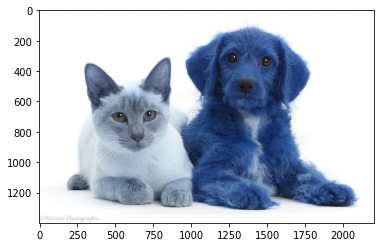

In [20]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('cat and dog.jpg')
original_image = image.copy()
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [21]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [22]:
from turtle import width


classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
height,width,channels = gray_image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=True)
net.setInput(blob)
outs = net.forward(output_layers)


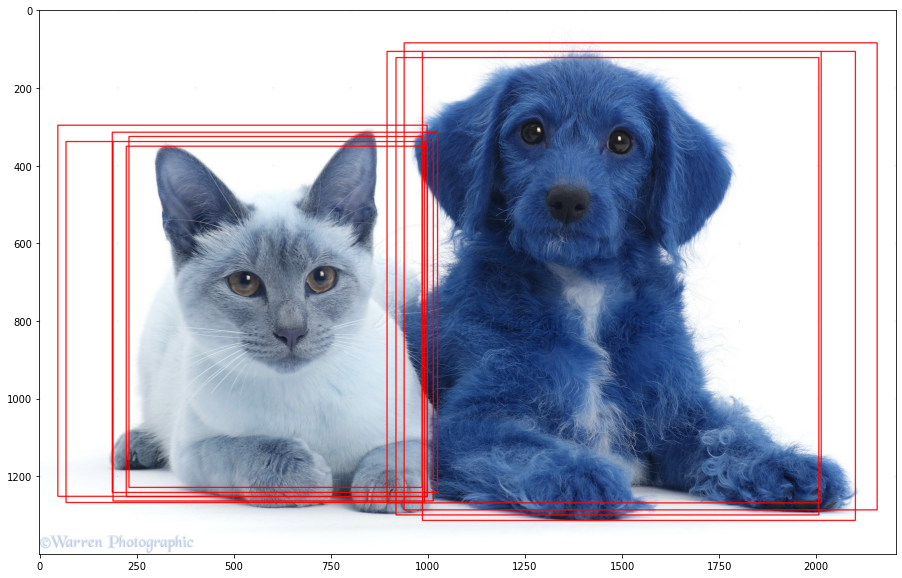

In [23]:
blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)
net.setInput(blob)
outs = net.forward(output_layers)


import numpy as np
class_ids = []
boxes = []
confidences = []


for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
#         print(confidence)
#         print(det)
        if confidence > 0.6:
            cx = int(det[0] * width)
            cy = int(det[1] * height)
            
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x, y = int(cx - w / 2), int(cy - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
#             print(class_ids)
#             print(confidences)
#             print(boxes)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize = (20,10))

plt.imshow(image)

10
[9 0]
895 106 1117 1162
dog
190 338 824 925
cat


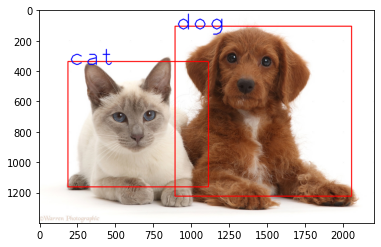

In [24]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        print(label)
        cv2.rectangle(gray_image, (x, y), (x+h, y+w), (255, 0, 0), 5)
        cv2.putText(gray_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 11, (0, 0, 255), 5)

plt.imshow(gray_image)
